In [1]:
#Helmet Detection Training

In [2]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.python.keras.models import load_model
data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
model=Sequential()

#create a convolutional layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))#Here 200 convolutional layer
model.add(Activation('relu'))#relu is the activation function
model.add(MaxPooling2D(pool_size=(2,2)))#2x2 maxpooling layer
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split
#data preperation
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
5/5 [==============================] - 23s 3s/step - loss: 0.6125 - accuracy: 0.6641 - val_loss: 0.5200 - val_accuracy: 0.7879
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/5
5/5 [==============================] - 14s 3s/step - loss: 0.5668 - accuracy: 0.7557 - val_loss: 0.5933 - val_accuracy: 0.7879
Epoch 3/5
5/5 [==============================] - 8s 2s/step - loss: 0.6092 - accuracy: 0.7557 - val_loss: 0.5487 - val_accuracy: 0.7879
Epoch 4/5
5/5 [==============================] - 8s 2s/step - loss: 0.5614 - accuracy: 0.7557 - val_loss: 0.5289 - val_accuracy: 0.7879
Epoch 5/5
5/5 [==============================] - 9s 2s/step - loss: 0.5980 - accuracy: 0.7557 - val_loss: 0.5186 - val_accuracy: 0.7879
INFO:tensorflow:Assets written to: model-005.model\assets


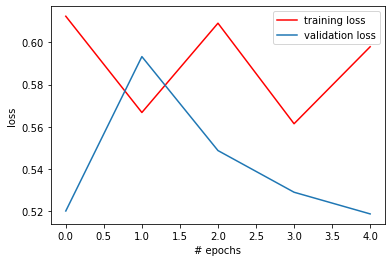

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

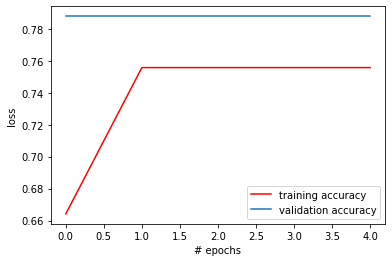

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()